<a href="https://colab.research.google.com/github/SMenon-14/Bird-Classification/blob/main/Birds_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#install required packages (including model maker)
!pip install -q tflite-model-maker

     |████████████████████████████████| 616 kB 4.4 MB/s 
     |████████████████████████████████| 77 kB 1.4 MB/s 
     |████████████████████████████████| 1.1 MB 18.6 MB/s 
     |████████████████████████████████| 1.2 MB 33.5 MB/s 
     |████████████████████████████████| 1.1 MB 16.0 MB/s 
     |████████████████████████████████| 213 kB 38.6 MB/s 
     |████████████████████████████████| 840 kB 35.2 MB/s 
     |████████████████████████████████| 87 kB 5.3 MB/s 
     |████████████████████████████████| 596 kB 23.3 MB/s 
     |████████████████████████████████| 120 kB 32.5 MB/s 
     |████████████████████████████████| 6.4 MB 30.7 MB/s 
     |████████████████████████████████| 3.4 MB 10.1 MB/s 
     |████████████████████████████████| 25.3 MB 1.8 MB/s 
     |████████████████████████████████| 99 kB 8.3 MB/s 
     |████████████████████████████████| 47.6 MB 82 kB/s 
     |████████████████████████████████| 352 kB 46.9 MB/s 
     |████████████████████████████████| 208 kB 42.0 MB/s 


In [ ]:
#import packages
import os

import numpy as np

import tensorflow as tf
assert tf.__version__.startswith('2')

from tflite_model_maker import model_spec
from tflite_model_maker import image_classifier
from tflite_model_maker.config import ExportFormat
from tflite_model_maker.config import QuantizationConfig
from tflite_model_maker.image_classifier import DataLoader

import matplotlib.pyplot as plt

In [ ]:
#mount drive (connect to your google drive)
from google.colab import drive
drive.mount ('/content/gdrive',force_remount=True)
print ('hello')

Mounted at /content/gdrive
hello


In [ ]:
#set image path (directory containing images)
image_path = '/content/gdrive/My Drive/2021TensorflowProjects/BirdClassification/Images/Training'

In [ ]:
#Split into Training and Testing data
data = DataLoader.from_folder(image_path)
train_data, test_data = data.split(0.9)

INFO:tensorflow:Load image with size: 360, num_label: 3, labels: Flamingo, Hummingbird, Peacock.


In [ ]:
model = image_classifier.create(train_data)

INFO:tensorflow:Retraining the models...
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hub_keras_layer_v1v2 (HubKe  (None, 1280)             3413024   
 rasLayerV1V2)                                                   
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 3)                 3843      
                                                                 
Total params: 3,416,867
Trainable params: 3,843
Non-trainable params: 3,413,024
_________________________________________________________________
None


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/5
10/10 [==============================] - 34s 2s/step - loss: 0.8739 - accuracy: 0.6469
Epoch 2/5
10/10 [==============================] - 2s 150ms/step - loss: 0.3585 - accuracy: 0.9875
Epoch 3/5
10/10 [==============================] - 2s 151ms/step - loss: 0.3403 - accuracy: 1.0000
Epoch 4/5
10/10 [==============================] - 2s 154ms/step - loss: 0.3427 - accuracy: 1.0000
Epoch 5/5
10/10 [==============================] - 2s 153ms/step - loss: 0.3383 - accuracy: 1.0000


In [ ]:
loss, accuracy = model.evaluate(test_data)

2/2 [==============================] - 5s 541ms/step - loss: 0.3240 - accuracy: 1.0000


In [ ]:
train_data, rest_data = data.split(0.8)
validation_data, test_data = rest_data.split(0.5)

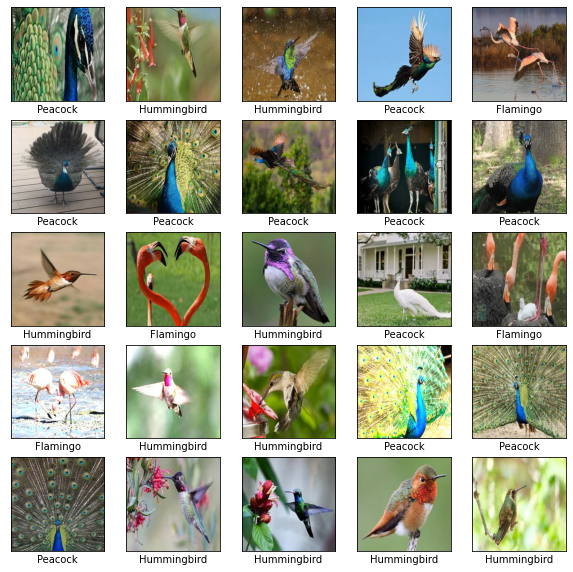

In [ ]:
plt.figure(figsize=(10,10))
for i, (image, label) in enumerate(data.gen_dataset().unbatch().take(25)):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)
  plt.xlabel(data.index_to_label[label.numpy()])
plt.show()

In [ ]:
model = image_classifier.create(train_data, validation_data=validation_data)

INFO:tensorflow:Retraining the models...


INFO:tensorflow:Retraining the models...


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hub_keras_layer_v1v2_1 (Hub  (None, 1280)             3413024   
 KerasLayerV1V2)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 1280)              0         
                                                                 
 dense_1 (Dense)             (None, 3)                 3843      
                                                                 
Total params: 3,416,867
Trainable params: 3,843
Non-trainable params: 3,413,024
_________________________________________________________________
None
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


9/9 [==============================] - 5s 326ms/step - loss: 0.8328 - accuracy: 0.7292 - val_loss: 0.4337 - val_accuracy: 1.0000
Epoch 2/5
9/9 [==============================] - 2s 261ms/step - loss: 0.3676 - accuracy: 0.9861 - val_loss: 0.3316 - val_accuracy: 1.0000
Epoch 3/5
9/9 [==============================] - 2s 254ms/step - loss: 0.3378 - accuracy: 0.9965 - val_loss: 0.3447 - val_accuracy: 1.0000
Epoch 4/5
9/9 [==============================] - 2s 258ms/step - loss: 0.3431 - accuracy: 1.0000 - val_loss: 0.3426 - val_accuracy: 1.0000
Epoch 5/5
9/9 [==============================] - 2s 257ms/step - loss: 0.3383 - accuracy: 1.0000 - val_loss: 0.3333 - val_accuracy: 1.0000


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hub_keras_layer_v1v2_1 (Hub  (None, 1280)             3413024   
 KerasLayerV1V2)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 1280)              0         
                                                                 
 dense_1 (Dense)             (None, 3)                 3843      
                                                                 
Total params: 3,416,867
Trainable params: 3,843
Non-trainable params: 3,413,024
_________________________________________________________________


In [ ]:
loss, accuracy = model.evaluate(test_data)

2/2 [==============================] - 1s 26ms/step - loss: 0.3236 - accuracy: 1.0000


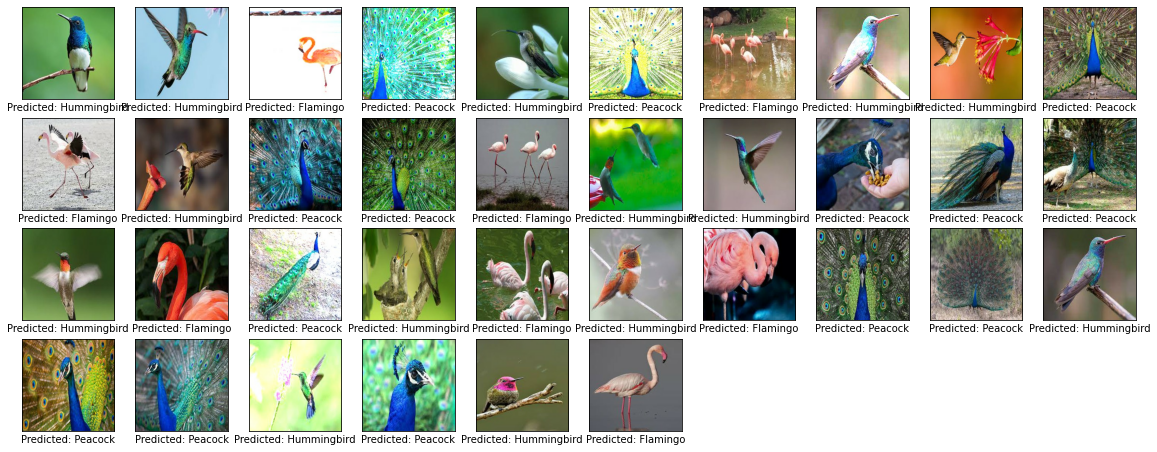

In [ ]:
# A helper function that returns 'red'/'black' depending on if its two input
# parameter matches or not.
def get_label_color(val1, val2):
  if val1 == val2:
    return 'black'
  else:
    return 'red'

# Then plot 100 test images and their predicted labels.
# If a prediction result is different from the label provided label in "test"
# dataset, we will highlight it in red color.
plt.figure(figsize=(20, 20))
predicts = model.predict_top_k(test_data)
for i, (image, label) in enumerate(test_data.gen_dataset().unbatch().take(100)):
  ax = plt.subplot(10, 10, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)

  predict_label = predicts[i][0][0]
  color = get_label_color(predict_label,
                          test_data.index_to_label[label.numpy()])
  ax.xaxis.label.set_color(color)
  plt.xlabel('Predicted: %s' % predict_label)
plt.show()

In [ ]:
model.export(export_dir='/content/gdrive/My Drive/2021TensorflowProjects/BirdClassification')

INFO:tensorflow:Assets written to: /tmp/tmpmsogmkio/assets


INFO:tensorflow:Assets written to: /tmp/tmpmsogmkio/assets


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Saving labels in /tmp/tmp8mob2zst/labels.txt


INFO:tensorflow:Saving labels in /tmp/tmp8mob2zst/labels.txt


INFO:tensorflow:TensorFlow Lite model exported successfully: /content/gdrive/My Drive/2021TensorflowProjects/BirdClassification/model.tflite


INFO:tensorflow:TensorFlow Lite model exported successfully: /content/gdrive/My Drive/2021TensorflowProjects/BirdClassification/model.tflite


In [ ]:
model.export(export_dir='/content/gdrive/My Drive/2021TensorflowProjects/BirdClassification', export_format=ExportFormat.LABEL)

INFO:tensorflow:Saving labels in /content/gdrive/My Drive/2021TensorflowProjects/BirdClassification/labels.txt


INFO:tensorflow:Saving labels in /content/gdrive/My Drive/2021TensorflowProjects/BirdClassification/labels.txt
